In [6]:
# Task-1:- Computer Graphics – 2D Scaling Transformation 
# Perform the basic transformation operations on a 2D-object (i.e a rectangle, triangle, 
# square, rhombus or polygon etc.). 
# 1. Translation 
# 2. Scaling 
# 3. Rotation 
# 4. Reflection 
# 5. Shearing of a 2-D object 
# Perform composite 2D-transformation: combine two or more transformations into one 
# single transformation that is equivalent to the transformations that are performed one 
# after one over a 2-D object.  
# Note:- Choose any language of your convenience. (preferably C, C++, Java, Python) 
# For C, C++ use the #include <graphics.h> library and for python we can use the import 
# numpy as np and for java we can use import java.awt.geom.AffineTransform;

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
def translation(shape, tx, ty):
    translate_matrix = np.array([[1, 0, tx],
                                  [0, 1, ty],
                                  [0, 0, 1]])
    return np.dot(translate_matrix, shape)

In [9]:
def scaling(shape, sx, sy):
    scale_matrix = np.array([[sx, 0, 0],
                              [0, sy, 0],
                              [0, 0, 1]])
    return np.dot(scale_matrix, shape)

In [10]:
def rotation(shape, angle):
    rad = np.radians(angle)
    rotate_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                               [np.sin(rad), np.cos(rad), 0],
                               [0, 0, 1]])
    return np.dot(rotate_matrix, shape)

In [11]:
def reflection(shape, axis):
    if axis == 'x':
        reflect_matrix = np.array([[1, 0, 0],
                                    [0, -1, 0],
                                    [0, 0, 1]])
    elif axis == 'y':
        reflect_matrix = np.array([[-1, 0, 0],
                                    [0, 1, 0],
                                    [0, 0, 1]])
    return np.dot(reflect_matrix, shape)

In [12]:
def shearing(shape, shx, shy):
    shear_matrix = np.array([[1, shx, 0],
                              [shy, 1, 0],
                              [0, 0, 1]])
    return np.dot(shear_matrix, shape)

In [13]:
# Square
shape = np.array([[0, 1, 1, 0],
                  [0, 0, 1, 1],
                  [1, 1, 1, 1]])

In [14]:
# Plot Original and Transformed shapes
def plot_shapes(original, transformed, title):
    plt.figure()
    plt.plot(original[0, :], original[1, :], 'bo-', label="Original")
    plt.plot(transformed[0, :], transformed[1, :], 'ro-', label="Transformed")
    plt.fill(original[0, :], original[1, :], 'b', alpha=0.2, label="Original Shape")
    plt.fill(transformed[0, :], transformed[1, :], 'r', alpha=0.2, label="Transformed Shape")
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

In [15]:
# Example transformations
translated_shape = translation(shape, 2, 3)
scaled_shape = scaling(shape, 2, 1.5)
rotated_shape = rotation(shape, 45)
reflected_shape = reflection(shape, 'x')
sheared_shape = shearing(shape, 1, 0.5)

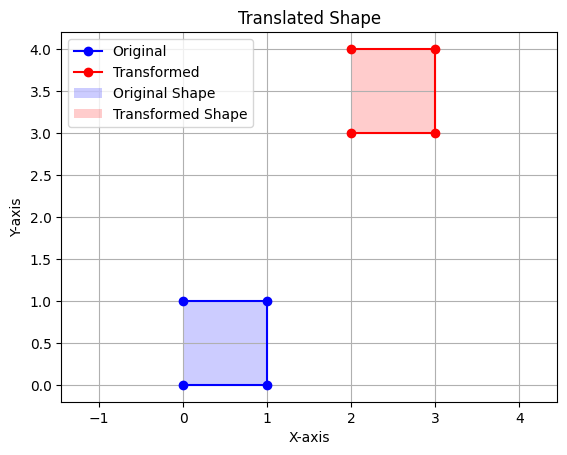

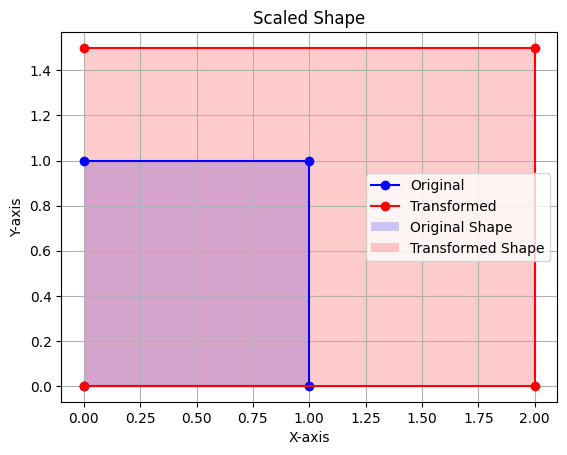

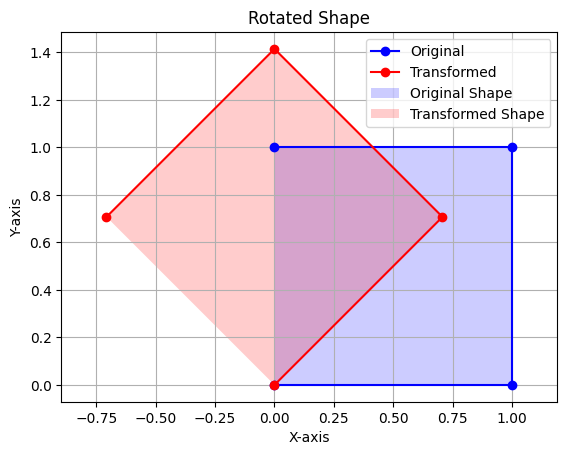

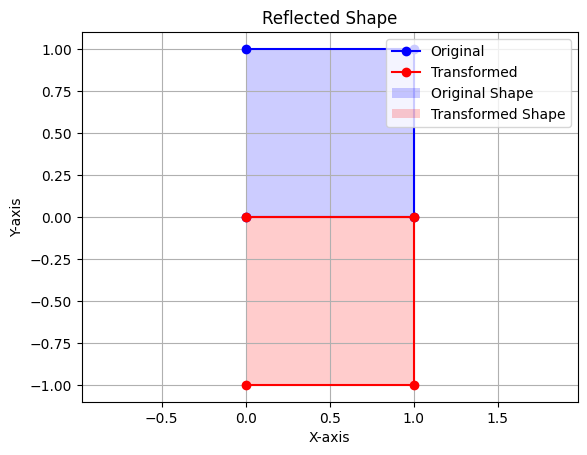

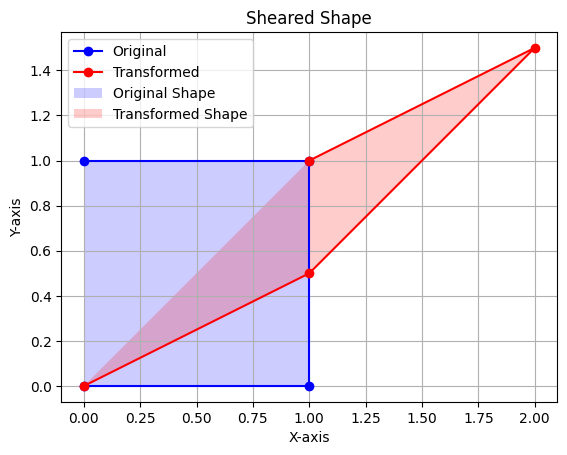

In [16]:
# Plotting transformations
plot_shapes(shape, translated_shape, "Translated Shape")
plot_shapes(shape, scaled_shape, "Scaled Shape")
plot_shapes(shape, rotated_shape, "Rotated Shape")
plot_shapes(shape, reflected_shape, "Reflected Shape")
plot_shapes(shape, sheared_shape, "Sheared Shape")

In [17]:
# Task-2:- Image Transformations using OpenCV in python 
# Image Transformation involves the transformation of image data in order to retrieve 
# information from the image or preprocess the image for further usage.  
# OpenCV: OpenCV (Open Source Computer Vision Library) is an open-source computer 
# vision and machine learning software library. OpenCV was built to provide a common 
# infrastructure for computer vision applications and to accelerate the use of machine 
# perception in commercial products.  By using it, one can process images and videos to 
# identify objects, faces, handwriting of a human etc. When it is integrated with various 
# libraries, such as NumPy, Python is capable of processing the OpenCV array structure 
# for analysis. 
# Perform the basic Perform the basic image transformation operations on the image 
# provided: 
# • Image Translation 
# • Reflection  
# • Rotation 
# • Scaling 
# • Cropping 
# • Shearing in x-axis 
# • Shearing in y-axis

In [18]:
image = cv2.imread('image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

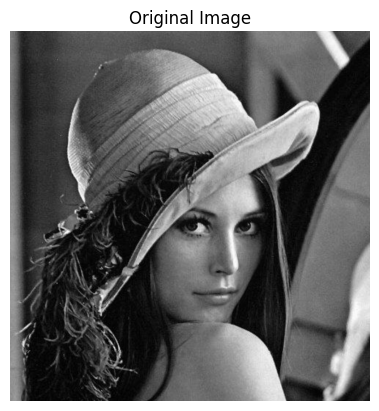

In [19]:
# Function for displaying images
def display_image(title, img):
    plt.figure()
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
display_image("Original Image", image)

In [20]:
# Image Translation
def image_translation(image, tx, ty):
    rows, cols, _ = image.shape
    translate_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, translate_matrix, (cols, rows))

In [21]:
# Image Scaling
def image_scaling(image, sx, sy):
    return cv2.resize(image, None, fx=sx, fy=sy, interpolation=cv2.INTER_LINEAR)

In [22]:
# Image Rotation
def image_rotation(image, angle):
    rows, cols, _ = image.shape
    center = (cols // 2, rows // 2)
    rotate_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(image, rotate_matrix, (cols, rows))

In [23]:
# Image Reflection
def image_reflection(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)  # Vertical flip
    elif axis == 'y':
        return cv2.flip(image, 1)  # Horizontal flip

In [24]:
# Image Shearing
def image_shearing(image, shx, shy):
    rows, cols, _ = image.shape
    shear_matrix = np.float32([[1, shx, 0],
                                [shy, 1, 0]])
    return cv2.warpAffine(image, shear_matrix, (cols, rows))

In [54]:
# Apply transformations
translated_image = image_translation(image, 50, 100)
scaled_image = image_scaling(image, 1.5, 1.5)
rotated_image = image_rotation(image, 45)
reflected_image_x = image_reflection(image, 'x')
reflected_image_y = image_reflection(image, 'y')
sheared_image = image_shearing(image, 0.5, 0.2)

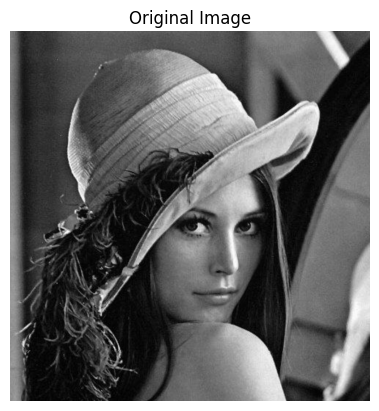

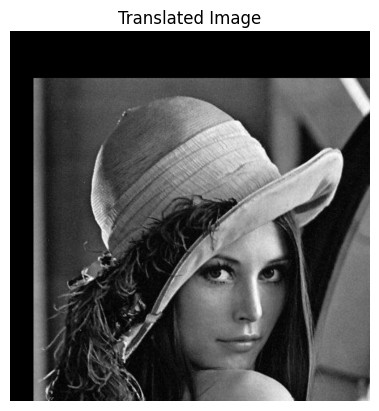

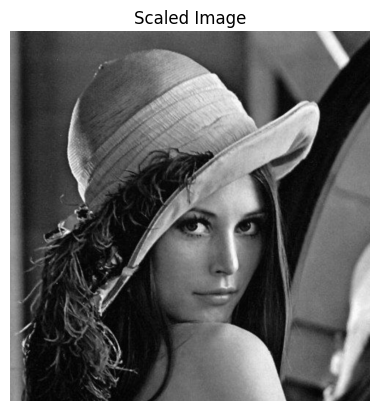

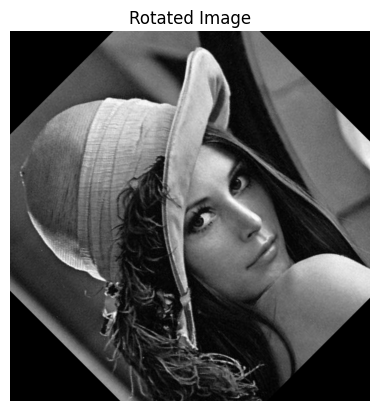

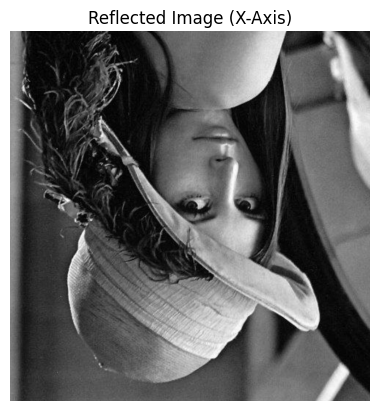

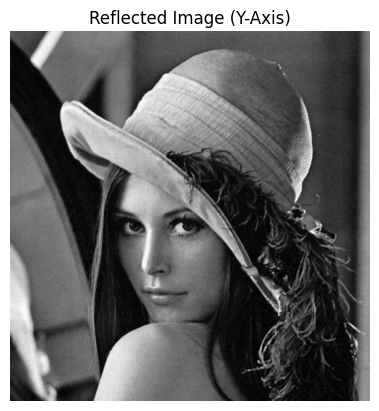

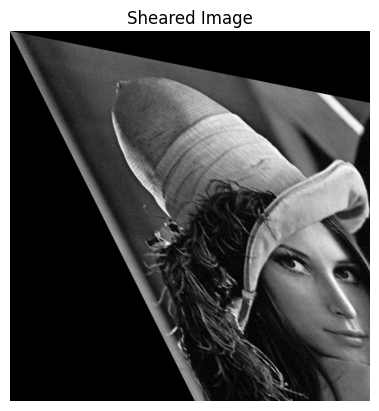

In [55]:
# Display transformations
display_image("Original Image", image)
display_image("Translated Image", translated_image)
display_image("Scaled Image", scaled_image)
display_image("Rotated Image", rotated_image)
display_image("Reflected Image (X-Axis)", reflected_image_x)
display_image("Reflected Image (Y-Axis)", reflected_image_y)
display_image("Sheared Image", sheared_image)